<a href="https://colab.research.google.com/github/alexandrufrunza/Sisteme-integrate/blob/main/Curs_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning folosind PyTorch

## Obiective

0.   Introducere
1.   Tensori
2.   Derivatele în PyTorch
3.   Regresia lineara
4.   Gradientul
5.   Seturi de date

# Introducere
În cea mai simplă formă o rețea neuronală poate fi imaginată ca o funcție matematică. Primește ca date de intrare una sau mai multe variabile, le procesează și returnează una sau mai multe variabile.
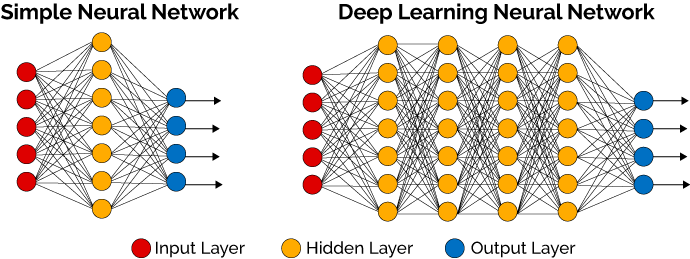

Deep Learning (https://www.deeplearningbook.org/) este o ramură a ML (Machine Learning) care se bazează pe decompoziția conceptelor în scopul obținerii unor performanțe superioare.
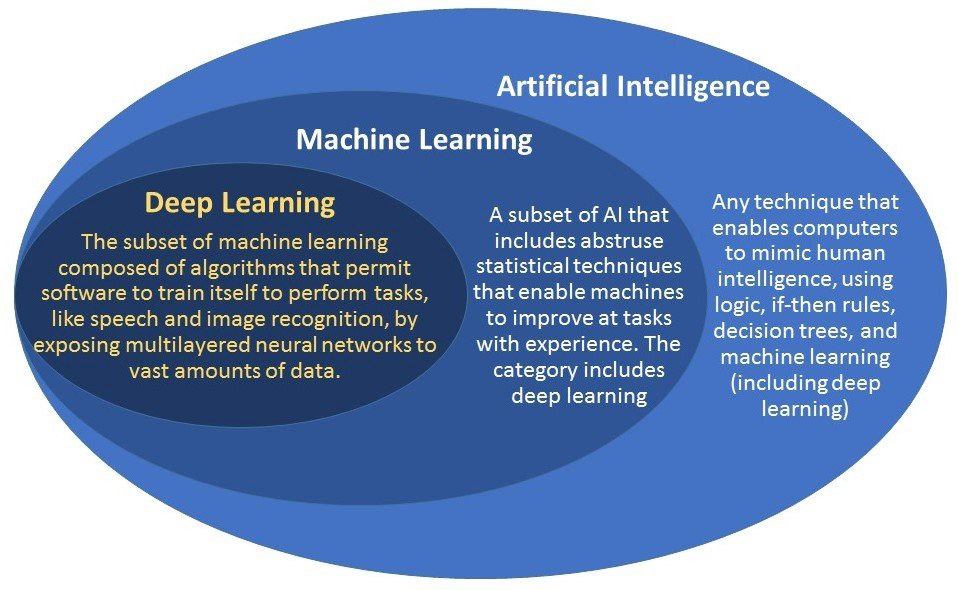

PyTorch (https://pytorch.org/) este un framework pentru Deep Learning ce folosește limbajul de programare Python. Este un framework open source, creat de Facebook. Se caracterizează printr-o sintaxă foarte asemănătoare cu cea tipică limbajului de programare Python. Principalele două caracteristici ale acestuia sunt legate de:


*   Capacitatea de implementa calculul cu tensori (similar NumPy) folosind paralelizarea (procesare grafice) (https://www.youtube.com/watch?v=-P28LKWTzrI)
*   Implementarea automată a calculului gradientului



## Instalare



*   Folosirea framework-ului pentru Data Science Anaconda (https://www.anaconda.com/products/individual)
*   Instalarea PyTorch (https://anaconda.org/pytorch/pytorch)
*   Pentru a putea folosi paralelizarea (procesorul/procesoarele grafice) este nevoie de instalarea concomitentă cu PyTorch a utilitarului CUDA (https://anaconda.org/anaconda/pytorch-gpu) (https://developer.nvidia.com/cuda-gpus)



# Alte framework-uri pentru Deep Learning în Python


*   TensorFlow (https://www.tensorflow.org/)
*   Keras (https://keras.io/)



# Tensori

Un tensor reprezintă un tip de date ce generalizează structurile de date multidimensionale. Toate datele de intrare și de ieșire ale unei rețele neuronale în PyTorch sunt tensori.

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

first_tensor = torch.tensor([12, 5, -2])
second_tensor = torch.tensor([[-3, 4], [5, 6]])
third_tensor = torch.tensor([ [[1, 2], [2, 3]], [[4, 5], [5, 6]]])

print(first_tensor, second_tensor, third_tensor, sep='\n')

tensor([12,  5, -2])
tensor([[-3,  4],
        [ 5,  6]])
tensor([[[1, 2],
         [2, 3]],

        [[4, 5],
         [5, 6]]])


## Utilizarea procesorului grafic

In [ ]:
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

cuda0 = torch.device('cuda:0')

first_cuda = torch.tensor([-4, 5, 7], device=cuda0)
second_cuda = torch.tensor([-2, 6, 7], device=cuda0)
sum_cuda = first_cuda + second_cuda
print(sum_cuda)

sum_cpu = sum_cuda.cpu()
print(sum_cpu)

# Derivatele în Pyotch (https://www.youtube.com/watch?v=MswxJw-8PvE)



In [ ]:
# Derivate în funcție de o singură variabilă
x = torch.tensor(2., requires_grad=True)
print("Tensorul x: ", x)

y = x**3 + 2*x
print("Tensorul y:", y)

y.backward()
print("Derivata functiei y în raport cu variabila x: ", x.grad)

In [ ]:
# Derivate parțiale
u = torch.tensor(3., requires_grad=True)
v = torch.tensor(2., requires_grad=True)

f = v**2 + u**3 - u*v
print("Valoarea funcției f: ", f)

f.backward()
print("Derivata parțială a funcției f în raport cu variabila u: ", u.grad)
print("Derivata parțială a funcției f în raport cu variabila v: ", v.grad)

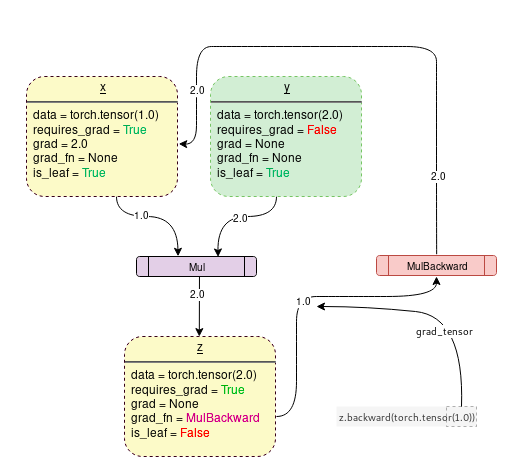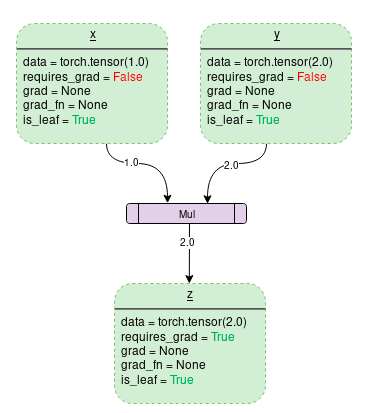

In [ ]:
print('data:',x.data)
print('grad_fn:',x.grad_fn)
print('grad:',x.grad)
print("is_leaf:",x.is_leaf)
print("requires_grad:",x.requires_grad)

print('data:',y.data)
print('grad_fn:',y.grad_fn)
print('grad:',y.grad)
print("is_leaf:",y.is_leaf)
print("requires_grad:",y.requires_grad)

In [ ]:
# Derivate în raport cu variabile multidimensionale

x = torch.linspace(-10, 10, 4, requires_grad = True)
Y = x ** 2
#y = torch.sum(x ** 2)

# Afișarea funcției și derivatei acesteia

Y.backward(torch.tensor([1.0, 1.0, 1.0, 1.0]))

plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'funcția')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivata')
plt.xlabel('x')
plt.legend()
plt.show()

# Regresia lineara

## Crearea și antrenarea unei rețele neuronale presupune realizarea următorilor pași:


1.   Definirea arhitecturii
2.   Propagarea în direcția forward (de le stânga la dreapta) a datelor de intrare
3.   Calculul funcției cost, erorii
4.   Propagarea în direcția backward (de la dreapta la stânga) în scoopul calcului derivatelor
5.   Actualizarea parametrilor pe baza ratei de învățare (learning rate)



# Definirea arhitecturii și propagarea în direcția forward

In [ ]:
# Ecuația unei drepte: y = mx + b
# Definirea parametrilor
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(1., requires_grad=True)

# Definirea funcției (Predicția)
def forward(x):
  yhat = w*x + b
  return yhat

x1 = torch.tensor([[3.0]])
yhat1 = forward(x1)
print("Predicția funcției: ", yhat1)

x2 = torch.tensor([[1.], [4.], [6.]])
yhat2 = forward(x2)
print("Predicția funcției: ", yhat2)

Predicția funcției:  tensor([[7.]], grad_fn=<AddBackward0>)
Predicția funcției:  tensor([[ 3.],
        [ 9.],
        [13.]], grad_fn=<AddBackward0>)


In [ ]:
from torch.nn import Linear

torch.manual_seed(100)

LR = Linear(in_features=1, out_features=1, bias=True)
print("Parametrii w și b:", list(LR.parameters()))

print(LR.state_dict())
print(LR.weight, LR.bias, sep='\n')

x3 = torch.tensor([[3.]])
yhat3 = LR(x3)

x4 = torch.tensor([[2.4],[4.]])
yhat4 = LR(x4)

print(yhat3, yhat4, sep='\n')

Parametrii w și b: [Parameter containing:
tensor([[-0.7767]], requires_grad=True), Parameter containing:
tensor([0.6317], requires_grad=True)]
OrderedDict([('weight', tensor([[-0.7767]])), ('bias', tensor([0.6317]))])
Parameter containing:
tensor([[-0.7767]], requires_grad=True)
Parameter containing:
tensor([0.6317], requires_grad=True)
tensor([[-1.6983]], grad_fn=<AddmmBackward>)
tensor([[-1.2323],
        [-2.4750]], grad_fn=<AddmmBackward>)


## Construcția de modele particulare

In [ ]:
from torch import nn

class LR_custom(nn.Module):
    
    # Constructorul
    def __init__(self, input_size, output_size):
        
        # Moștenirea proprietăților
        super(LR_custom, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Predicția
    def forward(self, x):
        out = self.linear(x)
        return out

lr_custom = LR_custom(1, 1)
print("The parameters: ", list(lr_custom.parameters()))
print("Linear model: ", lr_custom.linear)

x_lr = torch.tensor([[5.0],[3.]])
yhat = lr_custom(x_lr)
print("The prediction: ", yhat)

print("Python dictionary: ", lr_custom.state_dict())

The parameters:  [Parameter containing:
tensor([[-0.4746]], requires_grad=True), Parameter containing:
tensor([-0.9143], requires_grad=True)]
Linear model:  Linear(in_features=1, out_features=1, bias=True)
The prediction:  tensor([[-3.2874],
        [-2.3382]], grad_fn=<AddmmBackward>)
Python dictionary:  OrderedDict([('linear.weight', tensor([[-0.4746]])), ('linear.bias', tensor([-0.9143]))])


# Calculul funcției cost, erorii

Funcția cost este o funcție ce măsoara performanța unui algoritm Deep Learning/Machine Learning. Aceasta cuantifica eroarea dintre datele estimate și cele reale, prezentându-o sub forma unei singure variabile reale pozitive de tip scalar.

Funcția cost poate fi:


*   Minimizată: rezultatul poartă numele de cost sau eroare. Ex. eroarea medie pătratică
*   Maximizată: rezultatul poartă numele de recompensă. Ex. proiectorul ortogonal



In [ ]:
# Definirea criteriului de validare
def criterion(yhat,y):
  MSE = torch.mean((yhat-y)**2)
  return MSE

# Propagarea în direcția backward și actualizarea parametrilor

La baza acestei operațiuni stă algoritmul de optimizare denumit **gradient descent**. Gradient descent este cel mai utilizat algoritm de optimizare locală în cadrul rețelelor de tip Deep Learning/Machine Learning. Este un algoritm iterativ, simplu, ce folosește derivata funcției cost pentru a actualiza parametrii unui model și poate fi descris din punct de vedere matematic de următoarea ecuație:

>   $w_{k+1} = w_{k} - lr \nabla f(w)$

# Gradient descent poate fi implementat sub diferite forme cum ar fi:


*   Batch Gradient Descent
*   Stochastic Gradient Descent
*   Mini-batch Gradient Descent

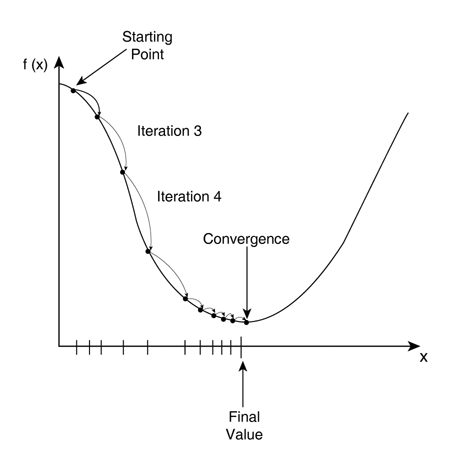





# Antrenarea modelului